In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = 'all'
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvb3Jlbi93b3JrL2Jsb2cvcG9zdHMvMjAyNC8yMDI0LTA1LTAxLXNpZ25hbHM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/home/oren/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_485066/3355474698.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.10/importlib/_bootstrap.py": 1700493245.0, "/usr/lib/python3.10/importlib/_bootstrap_external.py": 1700493245.0, "/usr/lib/python3.10/codecs.py": 1700493245.0, "/usr/lib/python3.10/encodings/aliases.py": 1700493245.0, "/usr/lib/python3.10/encodings/__init__.py": 1700493245.0, "/usr/lib/python3.10/encodings/utf_8.py": 1700493245.0, "/usr/lib/python3.10/abc.py": 1700493245.0, "/usr/lib/python3.10/io.py": 1700493245.0, "/usr/lib/python3.10/stat.py": 1700493245.0, "/usr/lib/python3.10/_collections_abc.py": 1700493245.0, "/usr/lib/python3.10/genericpath.py": 1700493245.0, "/usr/lib/python3.10/posixpath.py": 1700493245.0, "/usr/lib/python3.10/os.py": 1700493245.0, "/usr/lib/python3.10/_sitebuiltins.py": 1700493245.0, "/usr/lib/python3.10/types.py": 1700493245.0, "/usr/lib/python3.10/warnings.py": 1700493245.0, "/usr/lib/python3.10/importlib/__init__.py": 1700493245.0, "/usr/lib/python3.10/importlib/_abc.py": 1700493245.0, "/usr/lib/python3.10/keyword.py": 1700493245.0, "/u

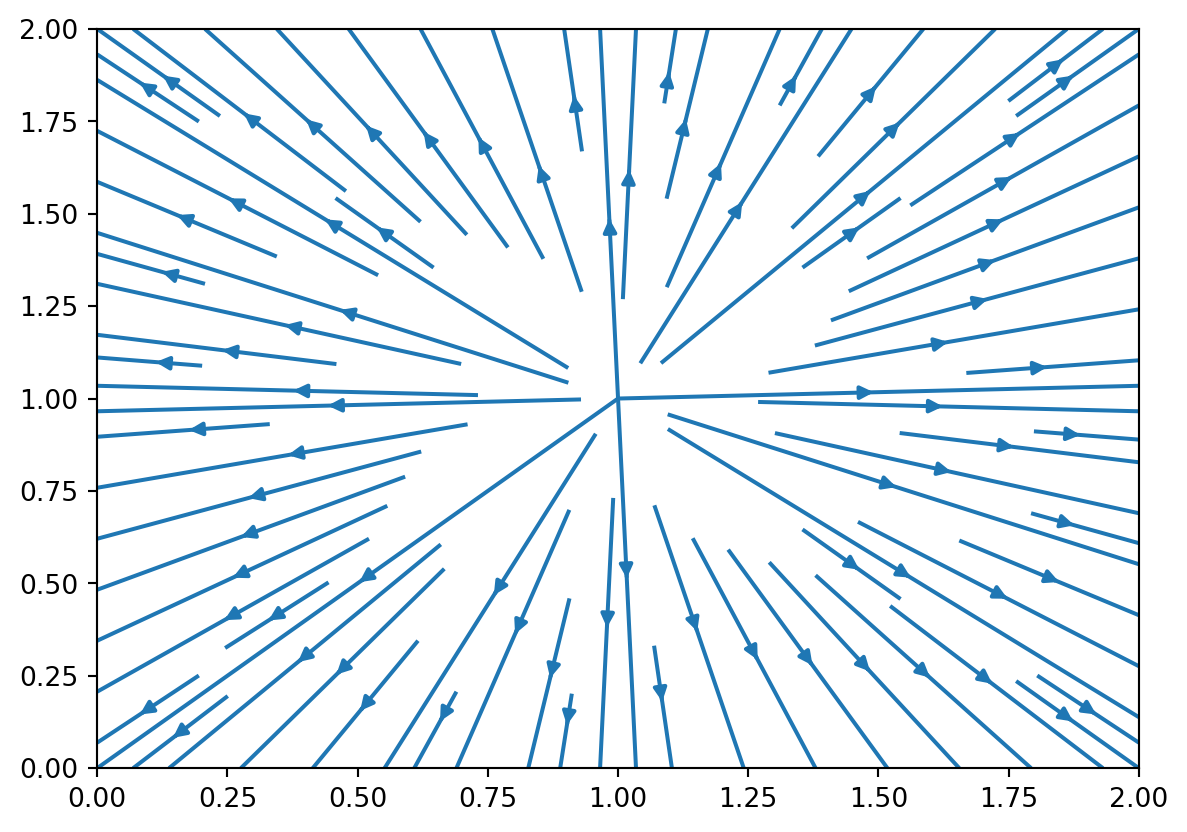

In [2]:
from pylab import *

alpha, beta = 1, 1
xvalues, yvalues = meshgrid(arange(0, 2.1, 0.1), arange(0, 2.1, 0.1))
xdot = xvalues * alpha - beta
ydot = yvalues * alpha - beta
streamplot(xvalues, yvalues, xdot, ydot)
show()

In [3]:
import itertools
import functools
from mesa import Agent, Model
from mesa.time import StagedActivation, RandomActivation
from mesa.datacollection import DataCollector
import matplotlib.pyplot as plt

# agent_roles
r_nature = 'nature'
r_sender = 'sender'
r_receiver = 'receiver'

In [4]:
class HerrnsteinRL():
    '''
                                    The Urn model
     nature            sender                 reciever     reward
                       
    | (0) | --{0}-->  | (0_a)  | --{a}--> | (a_0) | --{0}-->   1   
    |     |           | (0_b)  | --{b}    | (a_1) | --{1}-->   0
    |     |           +--------+    | +-->+-------+
    |     |                         +-|-+  
    | (1) | --{1}-->  | (1_a)  | --{a}+ +>| (b_0) | --{1}-->   1
    |     |           | (1_b)  | --{b}--->| (b_1) | --{0}-->   0
    +-----+           +--------+          +-------+
    
    
    Herrnstein Urn algorithm
    ------------------------
    
    1. nature picks a state 
    2. sender gets the state, chooses a signal by picking a ball in choose_option() from the stat'es urn
    3. reciver gets the action, chooses an actuion by picking a ball in choose_option()
    4. the balls in the urns are incremented if action == state
    5. repeat
    
    '''
    def __init__(self, options, learning_rate=1.0,verbose=False,name='Herrnstein matching law', balls=None):
        
        # filter options in choose option by input
        self.verbose = verbose
        self.name=name
        self.learning_rate = learning_rate
        self.options = options
        if balls is not None:
          self.balls = balls
        else:
          self.balls = {option: 1.0 for option in self.options}
        if self.verbose:
          print(f'LearningRule.__init__(Options: {options})')
    
    def get_filtered_urn(self, filter):
      ''' filters urn's options by prefix and normalizes the weights
          usege:
          urn=urn.get_filtered_urn(1)
          choice = model.random.choice(list(urn.keys()), p=list(urn.values()))
      '''
      assert type(filter) == int, f"filter must be a int"
      filtered_options = [key for key in self.balls.keys() if key[0] == filter]
      if not filtered_options:
        raise ValueError(f"No options found with filter {filter}")
      if self.verbose:
        print(f"in get_filtered_urn({filter=}) --- filtered_options: {filtered_options=}")
      filtered_balls = {opt: self.balls[opt] for opt in filtered_options}
      if self.verbose:
        print(f"in get_filtered_urn({filter=}) --- filtered_balls: {filtered_balls=}")
      total = functools.reduce(lambda a,b: a+b, filtered_balls.values())
      #total = sum(filtered_balls.values())
      if self.verbose:
        print(f"in get_filtered_urn({filter=}) --- total: {total=}")
      assert total > 0.0, f"total weights is {total=} after {filter=} on {self.balls}"      
      normalized_balls = {option: weight / total for option, weight in filtered_balls.items()}
      if self.verbose:
        print(f"in get_filtered_urn({filter=}) --- returning : {normalized_balls=}")
      return normalized_balls
     
    def choose_option(self,filter,random):
        ''' chooses an option from the urn based on the filter and the random choice
            
            usage:
            urn.choose_option(filter=1,random=model.random)
        '''
       
        urn = self.get_filtered_urn(filter)
        if random:
          options = random.choices(list(urn.keys()), weights=list(urn.values()),k=1)
          option = options[0]
          
          if self.verbose:
            print(f'in HerrnsteinRL.choose_option({filter=}) --- chose {option=} from {urn=}')

          return option
        else:
          raise Exception(f"random must be a random number generator")
        
    def update_weights(self, option, reward):
        old_balls = self.balls[option]
        self.balls[option] += self.learning_rate * reward 
        if self.verbose:
          print(f"Updated weight for option {option}: {old_balls} -> {self.balls[option]}")

In [5]:
class LewisAgent(Agent):
  
    def __init__(self, unique_id, model, game, role, verbose=False):
        super().__init__(unique_id, model)
        self.role = role #( one of nature, sender, receiver)
        self.verbose = verbose
        self.game = game
        self.messages = []
        self.actions = []
        if role == "sender":
          self.urn = HerrnsteinRL(model.states_signals, learning_rate=1.0,verbose=verbose,name='state_signal_weights')
        elif role == "receiver":
          self.urn = HerrnsteinRL(model.signals_actions, learning_rate=1.0,verbose=verbose,name='signal_action_weights')
        else:
          self.urn = None
        
    def step(self):
      # reset agent state before step
      self.messages = []
      self.actions = []

    def gen_state(self)-> None:
        if self.role == r_nature:
          self.current_state = model.random.choice(self.model.states)
          if self.verbose:
                print(f"Nature {self.unique_id} set state {self.current_state}")
                
    @property
    def state(self):
        if self.role == r_nature:
          return self.current_state

    def choose_signal(self, filter):
        # sanity checks for filter
        assert type(filter) == int, f"filter must be a int"
        assert filter in model.states, f"filter must be a valid state"
        
        
        if self.role != r_sender:
          throw(f"Only sender can send signals")
        self.option = self.urn.choose_option(filter=filter,random=self.model.random)
        signal = self.option[1] # the prefix is the urn context we want the suffix
        assert type(signal) == int, f"signal {signal=} must be a int"
        self.signal = signal
        if self.verbose:
              print(f"Sender {self.unique_id} got filter {filter} choose option: {self.option} and signaled: {self.signal}")
        return self.signal
          

    def send_signal(self, filter, receiver):
        ''' 
            # Message sending logic:
            1. sender chooses a signal based on the state
            2. sender sends the signal to the receiver
        '''
        if self.role != r_sender:
          raise Exception(f"Only sender can send signals")
         
        assert type(filter) == int, f"filter must be a int"
        assert filter in model.states, f"filter must be a valid state"
        signal = self.choose_signal(filter=filter)
        assert signal is not None, f"signal must be a valid signal"
        if self.verbose:
          print(f"Sender {self.unique_id} chose signal: {signal}")
        receiver.messages.append(signal)
        if self.verbose:
          print(f"Sender {self.unique_id} sends signal: {signal} to receiver {receiver.unique_id}")

    def fuse_actions(self,actions):
        ''' 
            # Message fusion logic:
            1. single message:  if there is only one signal then the action is the action associated with the signal
            2. ordered messages: if there are multiple signals then the action is the number from the string assocciated with the concatenated signal
               if there are two signals possible per message we concat and covert binary string to number
            3. is the messages are sets we could perform a intersetion and take the action associated with the intersection 
               currently this is not implemented
            4. support for recursive signals is currently under research .
        ''' 
        if self.role != r_receiver:
          raise Exception(f"Only receiver can set actions")
        
        if len(actions) == 1: # single action no need to fuse
          return actions[0]
        else:
          # fuse the actions into a binary number
          action = 0
          # if there are multiple signals
          for i in range(len(actions)):
            action += actions[i]*(2**i)
          if self.verbose:
              print(f"Receiver {self.unique_id} fused actions : {self.actions} into action: {action}")
          return action

    def decode_message(self,signal):
        ''' first we need to get the filtered urn for the signal
            and then choose the option based on the urn'''
        if self.role != r_receiver:
          raise Exception(f"Only receiver can decode messages")
        option = self.urn.choose_option(filter=signal,random=self.model.random)
        action = option[1]
        if self.verbose:
              print(f"in decode_message({signal=}) Receiver {self.unique_id} got option: {option} and decoded action: {action}")
        return action

    def set_action(self):
        ''' first we need to use the urn to decode the signals 
            then need to fuse them to get the action '''
        if self.role != r_receiver:
          raise Exception(f"Only receiver can set the action")
        self.actions = []
        for signal in self.messages:
          self.actions.append(self.decode_message(signal))          
        self.action = self.fuse_actions(self.actions)
        # which option to reinforce 
        self.option = (self.messages[0],self.action)
        if self.verbose:
              print(f"Receiver {self.unique_id} received signals: {self.messages} and action: {self.action}")
              
    def set_reward(self,reward):
        if self.role not in [r_receiver,r_sender]:
          raise Exception(f"Only sender and receiver can set rewards")
        self.reward = reward
        if self.verbose:
            print(f"Receiver {self.unique_id} received reward: {self.reward}")
                
    def calc_reward(self,correct_action):
        if self.role != r_receiver:
          raise Exception(f"Only receiver can calculate rewards")
        self.reward = 1 if self.action == correct_action else 0        

class SignalingGame(Model):
  
    # TODO: add support for 
    # 1. bottle necks
    # 2. rename k to state_count
    # 3. state_per_sender = state_count/sender_count 
    # 2. partitioning states by signals => state/sender_count

    def __init__(self, game_count=2, senders_count=1, recievers_count=1, state_count=3,signal_count=3,verbose=True):
        super().__init__()
        self.verbose = verbose
        self.step_counter = 0
        self.schedule = RandomActivation(self)
        
        
        # Define the states, signals, and actions
        self.states   = [i for i in range(state_count)]
        print(f'{self.states=}')
        self.signals  = [i for i in range(signal_count)]
        print(f'{self.signals=}')
        self.actions  = [i for i in range(state_count)]
        print(f'{self.actions=}')
        
        # e.g., 1 -> 1, 2 -> 2, ...
        self.states_signals =  [(state,signal) for state in self.states for signal in self.signals]
        print(f'{self.states_signals=}')
        self.signals_actions = [(signal,action) for signal in self.signals for action in self.actions] 
        print(f'{self.signals_actions=}')
        
        # Agents

        self.uid=0
        self.senders_count=senders_count
        self.recievers_count=recievers_count

        # Games each game has a nature, senders and receivers
        self.games = []
        # Create games        
        for i in range(game_count):
            game = {
              r_nature: None,
              r_sender: [],
              r_receiver: []
            }
            
            # create nature agent
            game[r_nature] = LewisAgent(self.uid, self, game=i,role = r_nature,verbose=self.verbose)
            self.schedule.add(game[r_nature])
            self.uid += 1
            
            # create sender agents
            for j in range(senders_count):
                sender = LewisAgent(self.uid, self, game=i,role = r_sender,verbose=self.verbose)
                game[r_sender].append(sender)
                self.schedule.add(sender)
                self.uid +=1
                
            # create receiver agents
            for k in range (recievers_count):
                reciever = LewisAgent(self.uid, self, game=i,role = r_receiver,verbose=self.verbose)
                game[r_receiver].append(reciever)
                self.schedule.add(reciever)
                self.uid +=1
                
            self.games.append(game)

            self.total_reward = 0
        

        # Define what data to collect
        self.datacollector = DataCollector(
            model_reporters={"TotalReward": lambda m: m.total_reward},  # A function to call 
            agent_reporters={"Reward": "reward"}  # An agent attribute
        )

    def compute_total_reward(self,model):
        return 
        
    def step(self):
      
        for agent in model.schedule.agents:
            # reset agent state before step
            agent.step()
            
        for game_counter, game in enumerate(self.games):
            if self.verbose:
                print(f"--- Step {model.step_counter} Game {game_counter} ---")
            nature = game[r_nature]
            nature.gen_state()
            state = nature.current_state
            assert type(state) == int, f"state must be a int"
            assert state in model.states, f"state must be a valid state"
            if self.verbose:
                print(f"in model.step() --- game {game_counter} --- Nature {agent.unique_id} set state {state} in game {game_counter}")
            for sender in game[r_sender]:
                for receiver in game[r_receiver]:                    
                    sender.send_signal(filter = state, receiver=receiver)
            for receiver in game[r_receiver]:
                assert receiver.role == r_receiver, f"receiver role must be receiver not {receiver.role}"
                receiver.set_action()
                if self.verbose:
                    print(f"in model.step() --- game {game_counter} --- Receiver {receiver.unique_id} action: {receiver.action}")
                receiver.calc_reward(correct_action=state)
                reward = receiver.reward
                assert type(reward) == int, f"reward must be a int not {type(reward)}"
                assert reward in [0,1], f"reward must be 0 or 1 not {reward}"
                print(f"in model.step() --- game {game_counter} --- Receiver {receiver.unique_id} received reward: {receiver.reward}")
            
            for agent in itertools.chain(game[r_sender],game[r_receiver]):
                agent.set_reward(reward)
                if self.verbose:
                    print(f"in model.step() --- game {game_counter} --- Sender {agent.unique_id} received reward: {reward}")
                agent.urn.update_weights(agent.option, reward)

            #print(f'in model.step() --- game {game_counter}, {self.expected_rewards(game)=}')
                    # Collect data
        
        self.total_reward += sum(agent.reward for agent in self.schedule.agents if agent.role == r_receiver)

        self.datacollector.collect(self)


    def expected_rewards(self,game):
      return 0.25

    def run_model(self, steps):

        """Run the model until the end condition is reached. Overload as
        needed.
        """
        while self.running:
            self.step()
            steps -= 1
            if steps == 0:
                self.running = False

self.states=[0, 1, 2]
self.signals=[0, 1, 2]
self.actions=[0, 1, 2]
self.states_signals=[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
self.signals_actions=[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
LearningRule.__init__(Options: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)])
LearningRule.__init__(Options: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)])
LearningRule.__init__(Options: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)])
LearningRule.__init__(Options: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)])
--- Step 0 Game 0 ---
Nature 0 set state 2
in model.step() --- game 0 --- Nature 5 set state 2 in game 0
in get_filtered_urn(filter=2) --- filtered_options: filtered_options=[(2, 0), (2, 1), (2, 2)]
in get_filtered_urn(filter=2) --- filtered_balls: filtered_balls={(2, 0): 1.0, (2, 1): 1.0, (2, 2): 1.0}
in get_filtered_urn(f

/home/oren/.local/lib/python3.10/site-packages/mesa/time.py:82: FutureWarning:

The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919

/tmp/ipykernel_485066/3700252942.py:248: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.



<Figure size 960x768 with 0 Axes>

Text(0.5, 0, 'Step')

Text(0, 0.5, 'Total Reward')

Text(0.5, 1.0, 'Total Reward over Time')

(0.0, 1048.95)

(0.0, 1000.0)

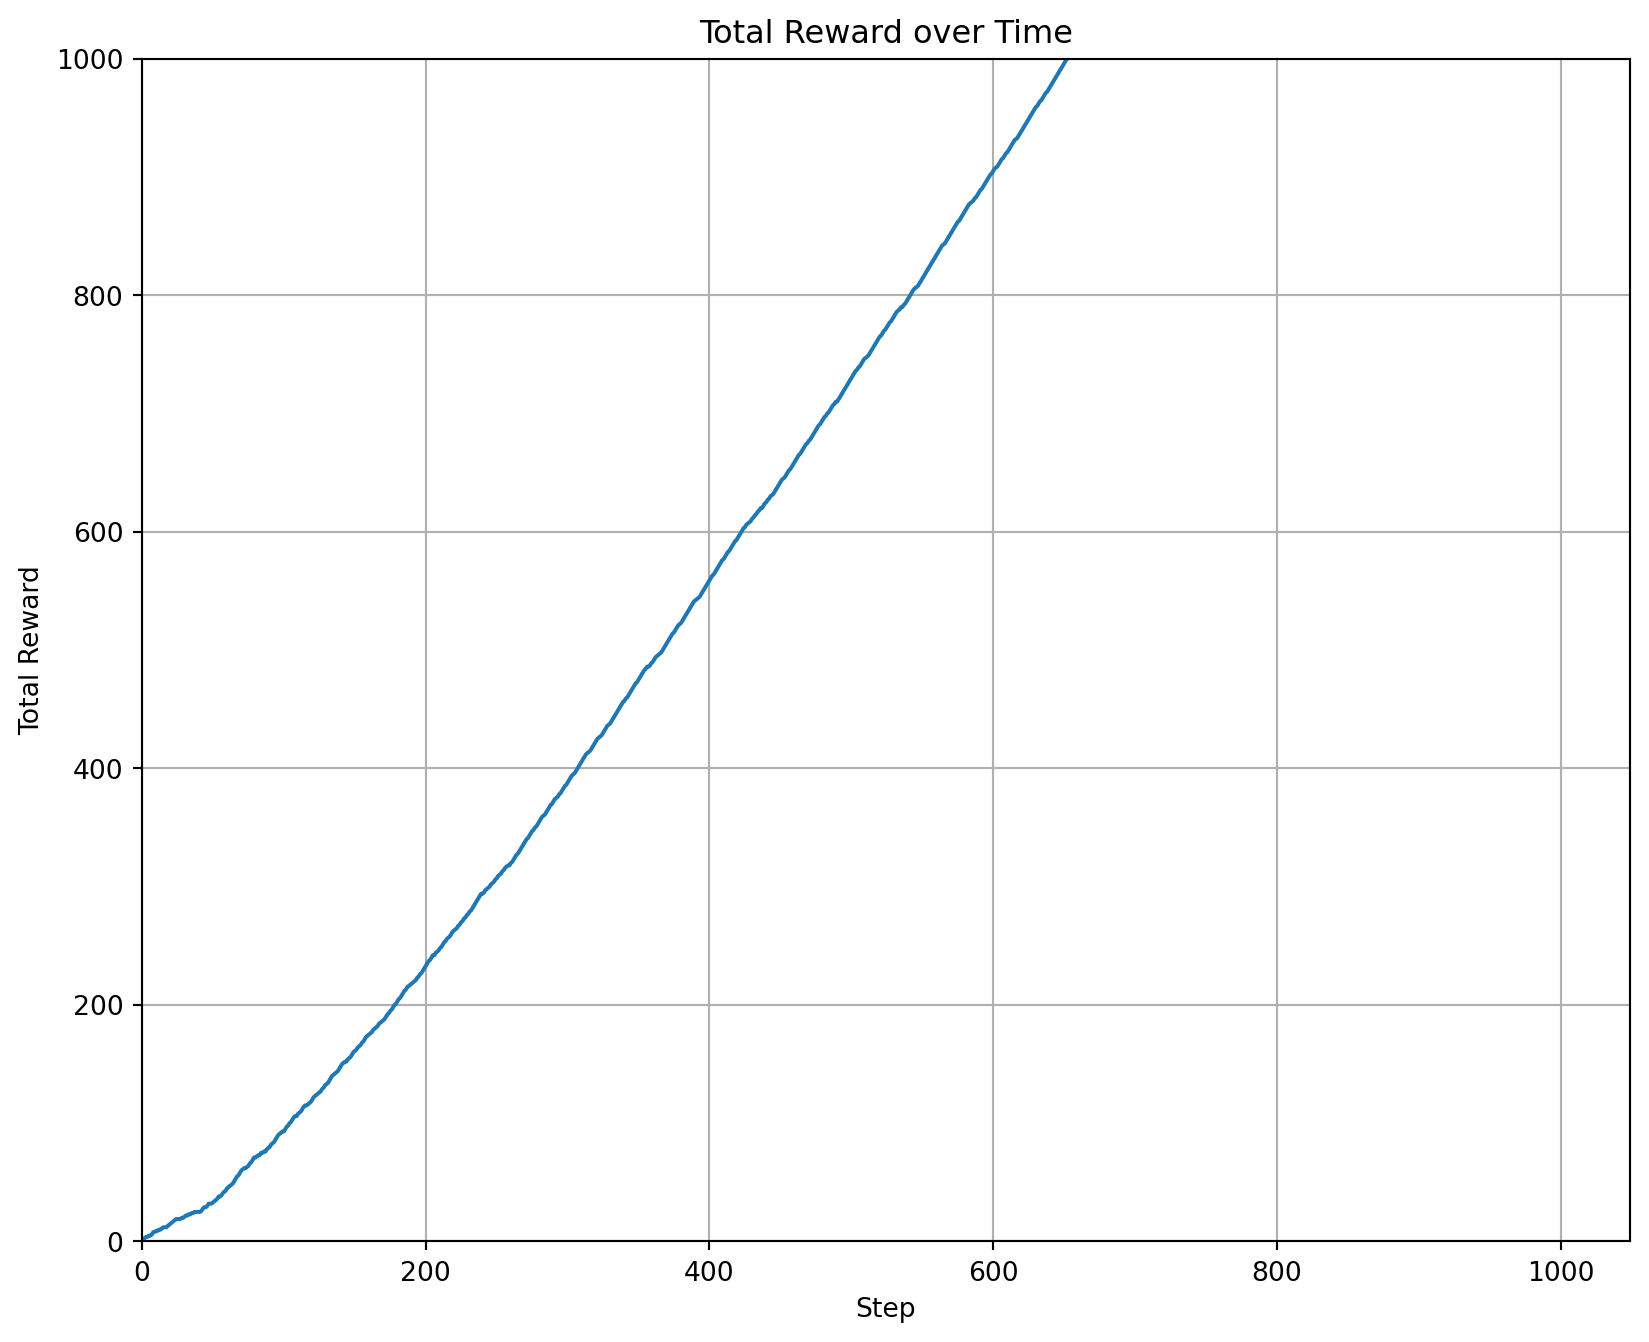

In [6]:
# Running the model
state_count= 3  # Number of states, signals, and actions
signal_count= 3
steps = 1000

model = SignalingGame(senders_count=1,recievers_count=1,state_count=state_count,signal_count=signal_count,verbose=True,game_count=2)
model.run_model(steps)  # Run the model for the desired number of steps

# Get the reward data
reward_data = model.datacollector.get_model_vars_dataframe()

# Plot the data
plt.figure(figsize=(10, 8))
plt.plot(reward_data['TotalReward'])
plt.xlabel('Step')
plt.ylabel('Total Reward')
plt.title('Total Reward over Time')
plt.grid(True)  # Add gridlines
plt.xlim(left=0)  # Start x-axis from 0
plt.ylim(bottom=0,top=1000)  # Start y-axis from 0
plt.show()     

In [7]:
import itertools

def cayley_distance(pi, sigma):
    """Calculate the Cayley distance between two permutations."""
    count = 0
    temp = list(pi)
    for i in range(len(pi)):
        while temp[i] != sigma[i]:
            swap_index = temp.index(sigma[i])
            temp[i], temp[swap_index] = temp[swap_index], temp[i]
            count += 1
    return count

def median_permutation(permutations):
    n = len(permutations[0])  # Assuming all permutations are of the same length
    current = list(permutations[0])  # Start with the first permutation as an initial guess
    improving = True

    while improving:
        improving = False
        best_distance = sum(cayley_distance(current, p) for p in permutations)
        for i, j in itertools.combinations(range(n), 2):
            current[i], current[j] = current[j], current[i]  # Swap elements
            new_distance = sum(cayley_distance(current, p) for p in permutations)
            if new_distance < best_distance:
                best_distance = new_distance
                improving = True
            else:
                current[i], current[j] = current[j], current[i]  # Swap back if no improvement

    return current

# Example usage
permutations = [
    [1, 2, 3, 4],
    [2, 1, 4, 3],
    [1, 3, 4, 2],
    [4, 3, 2, 1]
]
print("Median permutation:", median_permutation(permutations))

Median permutation: [1, 2, 3, 4]


/tmp/ipykernel_485066/3341496467.py:21: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/tmp/ipykernel_485066/3341496467.py:24: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.



In [8]:
from mesa import Agent, Model
from mesa.time import StagedActivation
import random

class LewisAgent(Agent):
  
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.message = None
        self.action= None

    def send(self):
      pass
    
    def recive(self):
      pass

    def calc_reward(self):
      pass
    
    def set_reward(self):
        self.reward = model.reward
        # Placeholder for learning logic
        print(f"Agent {self.unique_id} received reward: {self.reward}")
 
class Sender(LewisAgent):
  
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)

    def send(self):
        state = self.model.get_state()
        # Learning to map states to signals
        self.message = self.model.states_signals[state]
        print(f"Sender {self.unique_id} sends signal for state {state}: {self.message}")

class Receiver(LewisAgent):
  
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)

    def recive(self):
      self.received_signals=[]
      for sender in self.model.senders:
        self.received_signals.append(sender.message)
            # Learning to map signals to actions
      if len(self.received_signals)==1:
        self.action = self.model.signals_actions[self.received_signals[0]]
      else:
        self.action = self.model.signals_actions[self.received_signals[0]]
      

    def calc_reward(self):
      action = self.model.signals_actions[self.received_signals[0]]
      correct_action = self.model.states_actions[self.model.current_state]
      reward = 1 if action == correct_action else 0
      model.reward = reward


class SignalingGame(Model):
    def __init__(self, senders_count=1, recievers_count=1, state_count=3):
        
        super().__init__()
        self.senders_count=senders_count
        self.recievers_count=recievers_count
        self.num_agents = self.recievers_count+self.senders_count

        # e.g., 0 -> A, 1 -> B, ...
        self.states_signals = {i: chr(65 + i) for i in range(k)} 

        # e.g., A -> 0, B -> 1, ...
        self.signals_actions = {chr(65 + i): i for i in range(k)}
        
        # state 0 needs action 0, state 1 needs action 1, ...
        self.states_actions = {i: i for i in range(k)}  
        
        self.current_state = None

        # Create agents
        self.senders = []
        self.receivers=[]
        self.my_agents=[]
        self.uid=0
        for i in range(self.senders_count):
            sender = Sender(self.uid, self)
            self.senders.append(sender)
            self.my_agents.append(sender)
            self.uid +=1
        for j in range (self.recievers_count):
            reciever = Receiver(self.uid, self)
            self.receivers.append(reciever)
            self.my_agents.append(reciever)
            self.uid +=1

        self.schedule = StagedActivation(
          model=self,
          agents=self.my_agents, 
          stage_list = ['send','recive','calc_reward','set_reward']
        )
    
    def get_state(self):
        return self.current_state

    def step(self):
        self.current_state = random.choice(list(self.states_signals.keys()))
        print(f"New state of the world: {self.current_state}")
        self.schedule.step()

# Running the model
k = 3  # Number of states, signals, and actions
steps = 10
model = SignalingGame(senders_count=2,recievers_count=1,state_count=k)
for i in range(steps):
    print(f"--- Step {i+1} ---")
    model.step()

--- Step 1 ---
New state of the world: 1
Sender 0 sends signal for state 1: B
Sender 1 sends signal for state 1: B
Agent 0 received reward: 1
Agent 1 received reward: 1
Agent 2 received reward: 1
--- Step 2 ---
New state of the world: 0
Sender 0 sends signal for state 0: A
Sender 1 sends signal for state 0: A
Agent 0 received reward: 1
Agent 1 received reward: 1
Agent 2 received reward: 1
--- Step 3 ---
New state of the world: 1
Sender 0 sends signal for state 1: B
Sender 1 sends signal for state 1: B
Agent 0 received reward: 1
Agent 1 received reward: 1
Agent 2 received reward: 1
--- Step 4 ---
New state of the world: 1
Sender 0 sends signal for state 1: B
Sender 1 sends signal for state 1: B
Agent 0 received reward: 1
Agent 1 received reward: 1
Agent 2 received reward: 1
--- Step 5 ---
New state of the world: 1
Sender 0 sends signal for state 1: B
Sender 1 sends signal for state 1: B
Agent 0 received reward: 1
Agent 1 received reward: 1
Agent 2 received reward: 1
--- Step 6 ---
New s